# **`Resume Screening model`** 
##### -Paramesh E

*Description :*
- Resume screening technology can be used to analyze resumes and cover letters for job openings, using AI algorithms to identify relevant qualifications and experience that match the requirements of the job posting.

- This can help HR professionals to identify qualified job candidates more efficiently, and reduce the time and cost associated with the recruitment process.

- Resume screening can also help to minimize bias in the hiring process, ensuring that all candidates are evaluated based on their qualifications and experience, rather than irrelevant personal characteristics.

- Overall, resume screening can help HR departments to optimize the recruitment process, improve the quality of hires, and ensure compliance with legal and ethical hiring practices

In [1]:
# connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# **Data Reading**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Resume_screening_paramesh/UpdatedResumeDataSet.csv' ,encoding='utf-8')
df['cleaned_resume'] = ''
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [4]:
df.info() #inspecting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [5]:
# Displaying the distinct categories
print (df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
# Creating Category dataframe
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


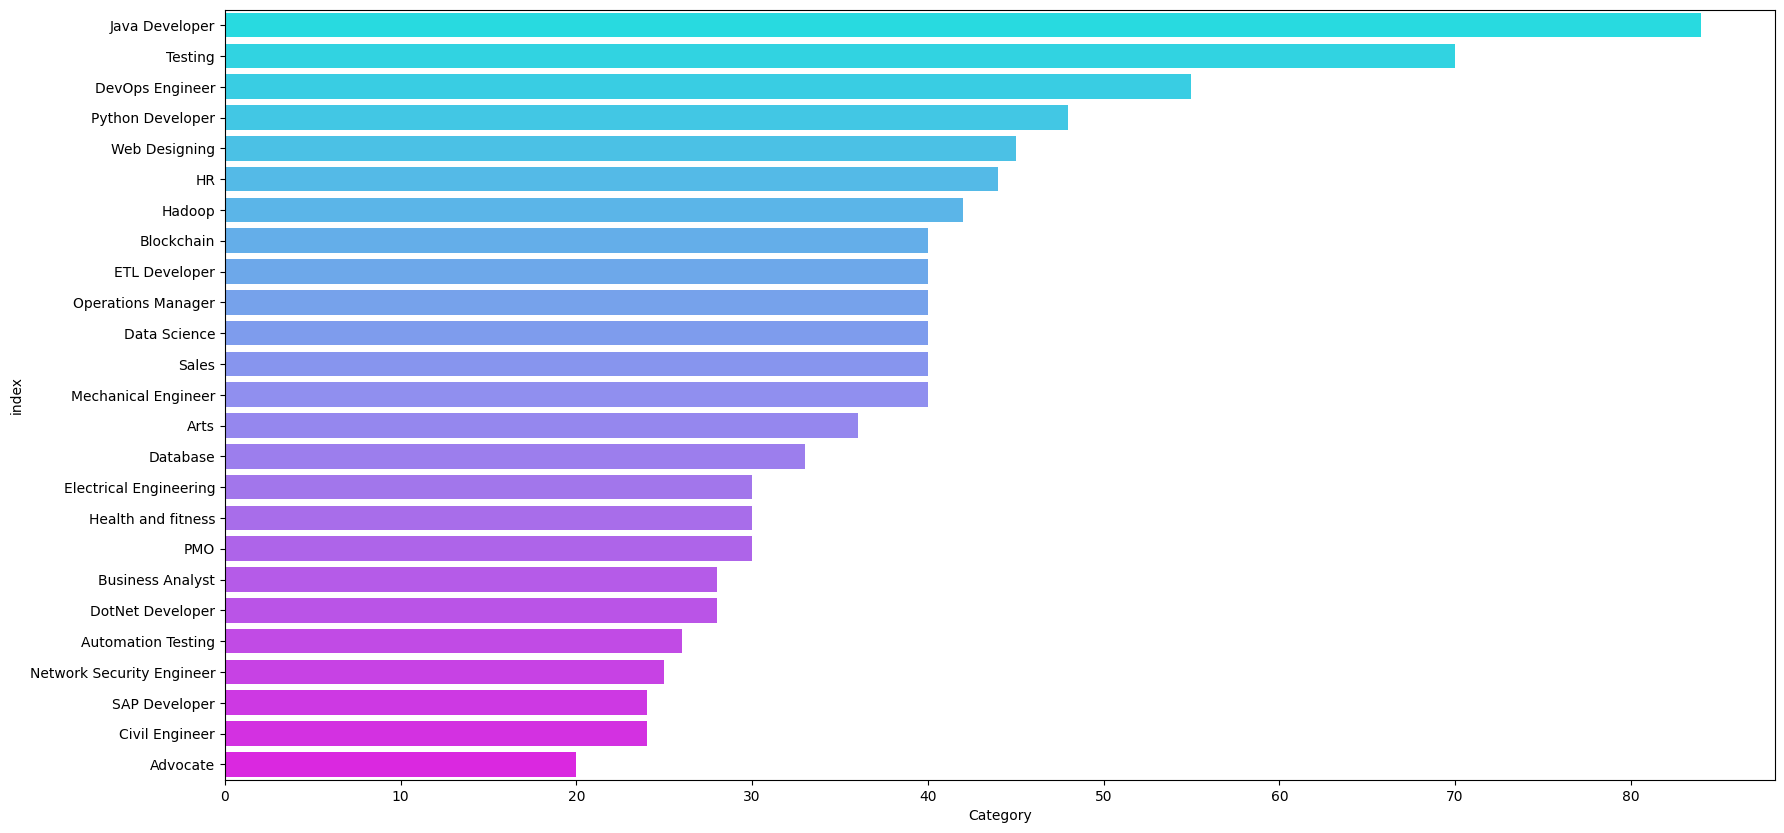

In [7]:
# Visualising category dataframe
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()

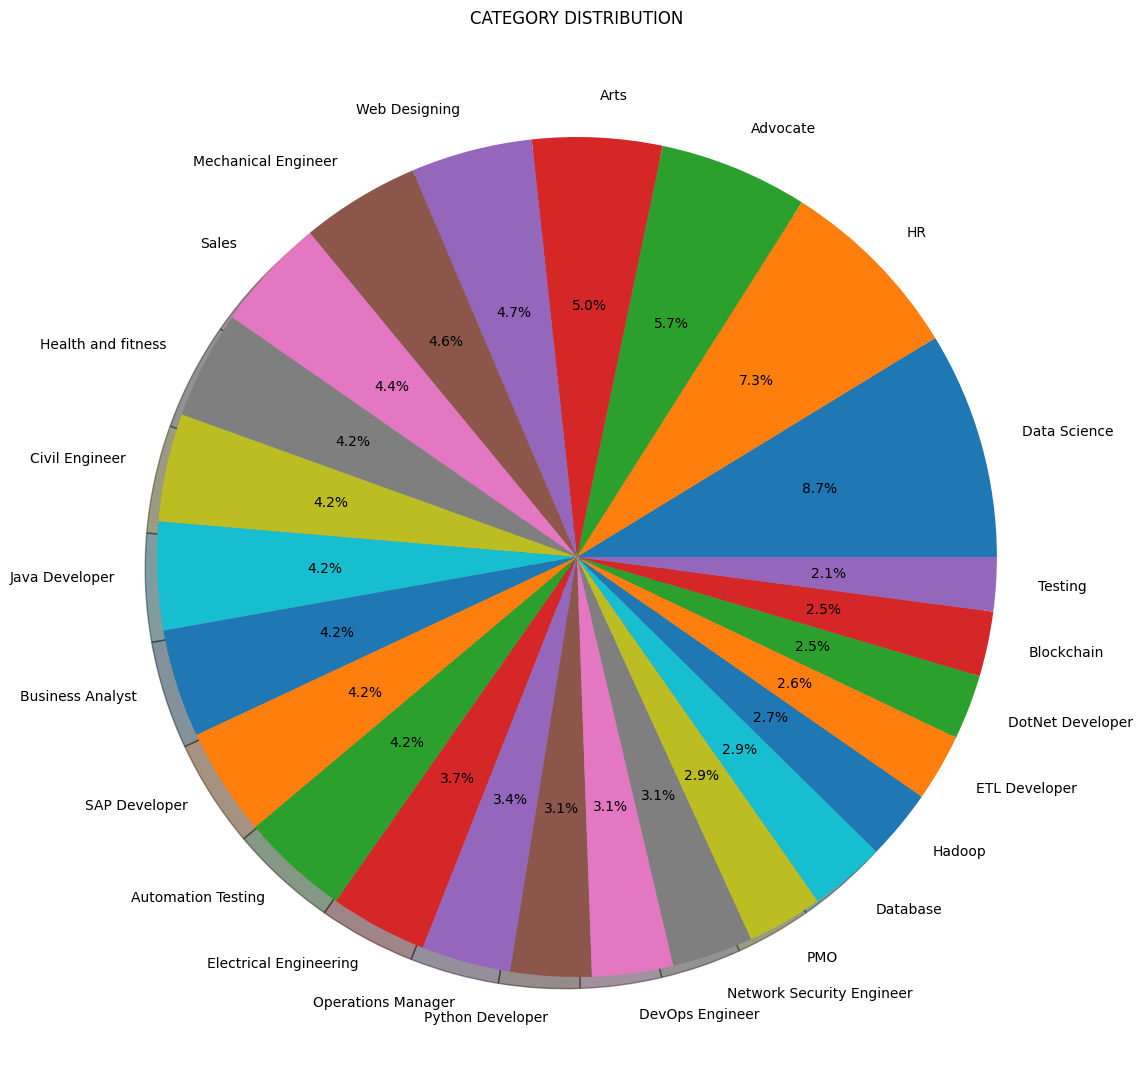

In [8]:
# Creating pie-chart of category distribution
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()

# Make square figures and axes
plt.figure(1, figsize=(30,30))
the_grid = GridSpec(2, 2)

# color mapping
cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

# **Data Pre-Processing**

In [9]:
# defining resume cleaning function
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [10]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import nltk
nltk.download('punkt') # configuring packages

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk.corpus import stopwords # importing stopwords

In [14]:
# unzipping stopwords
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import string
punctuations = string.punctuation

In [16]:
# removing stopwords from sentences and removing punctuations
Stopwords_set = set(stopwords.words('english')+['``',"''"])
words_total =[]
Sentences = df['Resume'].values
Clean_sentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    Clean_sentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in Stopwords_set and word not in punctuations:
            words_total.append(word)
    
wordfreqdist = nltk.FreqDist(words_total)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [17]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from wordcloud import WordCloud

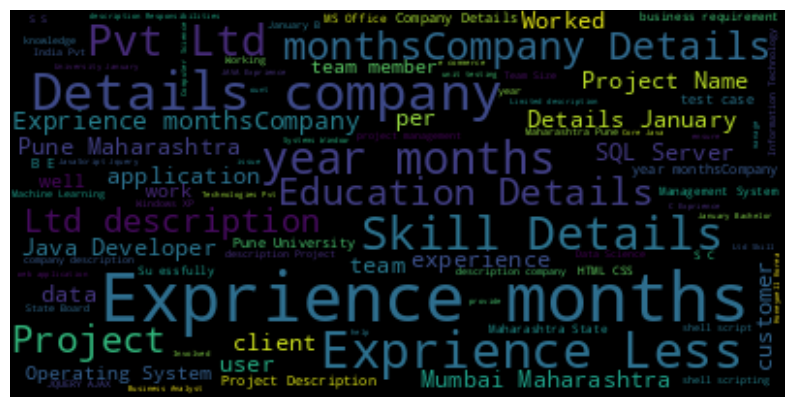

In [19]:
# Creating WordCLoud
wc = WordCloud().generate(Clean_sentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# creating copy before lable encoding
df_d=df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [22]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [23]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [24]:
category_num = df.Category.value_counts().to_frame().reset_index()
category_num.columns = ['value', 'count']
print(category_num)

    value  count
0      15     84
1      23     70
2       8     55
3      20     48
4      24     45
5      12     44
6      13     42
7       3     40
8      10     40
9      18     40
10      6     40
11     22     40
12     16     40
13      1     36
14      7     33
15     11     30
16     14     30
17     19     30
18      4     28
19      9     28
20      2     26
21     17     25
22     21     24
23      5     24
24      0     20


In [25]:
df_d.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [26]:
del df_d #clearing the space occupied 

# **Model Building**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['cleaned_resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [28]:
# predicting with K-NeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [29]:
# Printing Accuracy matrix
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

### **K Neighbors Classifier models are giving accurate accurancy, As a result, we can conclude that the model we are using is a generalised and good model**

In [30]:
# predicting with LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

print('Accuracy of LogisticRegression on training set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy ofLogisticRegression on test set:     {:.2f}'.format(lr.score(X_test, y_test)))



Accuracy of LogisticRegression on training set: 1.00
Accuracy ofLogisticRegression on test set:     0.99


In [31]:
print("\n Classification report for classifier %s:\n%s\n" % (lr, metrics.classification_report(y_test, y_pred_lr)))


 Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1

### **Logistic Regression models are giving accurate accurancy, As a result, we can conclude that the model we are using is a generalised and good model**

## **Here we got almost same accuracy for both the models, both models KNeighbors Classifier and Logistic Regression are giving accurate accurancy, As a result, we can conclude that the model we are using is a generalised and good model**

# **Naive Bayes Model**

In [46]:
# Importing neccesary libraries
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import PlaintextCorpusReader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [33]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [34]:
# Feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["cleaned_resume"])
y = df["Category"]

In [35]:
# Training the model
clf = MultinomialNB()
predictions = clf.fit(X, y)

In [47]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Return preprocessed text
    return ' '.join(filtered_tokens)

In [52]:
# Test the model
test_resume = "I am a software engineer with experience in Python and machine learning."
preprocessed_test_resume = preprocess_text(test_resume)
test_X = vectorizer.transform([preprocessed_test_resume])
predicted_category = predictions.predict(test_X)[0]

In [53]:
print("Predicted category:", predicted_category)

Predicted category: 6


# **SAVING THE MODEL USING**

### saving model udsing to a file using the `joblib` method on model object  method

In [54]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes model
clf = MultinomialNB()

# Train the model on your data
predictions = clf.fit(X, y)

# Save the model to a file
with open('/content/drive/MyDrive/Resume_screening_paramesh/model_Pred.pkl', 'wb') as f:
    pickle.dump(predictions, f)

In [55]:
import pickle

# Save the vectorizer to a file
with open('/content/drive/MyDrive/Resume_screening_paramesh/vectorizer_Pred.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

**Saved our resume category predicting model, now we move on to deployment purposes, by creating a separate load_predict.py file for deployment**